# **Introduction**


---


In [0]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import folium
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors
from IPython.display import Image

In [0]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

### ***description of the problem*** 





The problem would be to determine which cities in South America are similar, to be additional information for tourists or agencies, when making a trip.

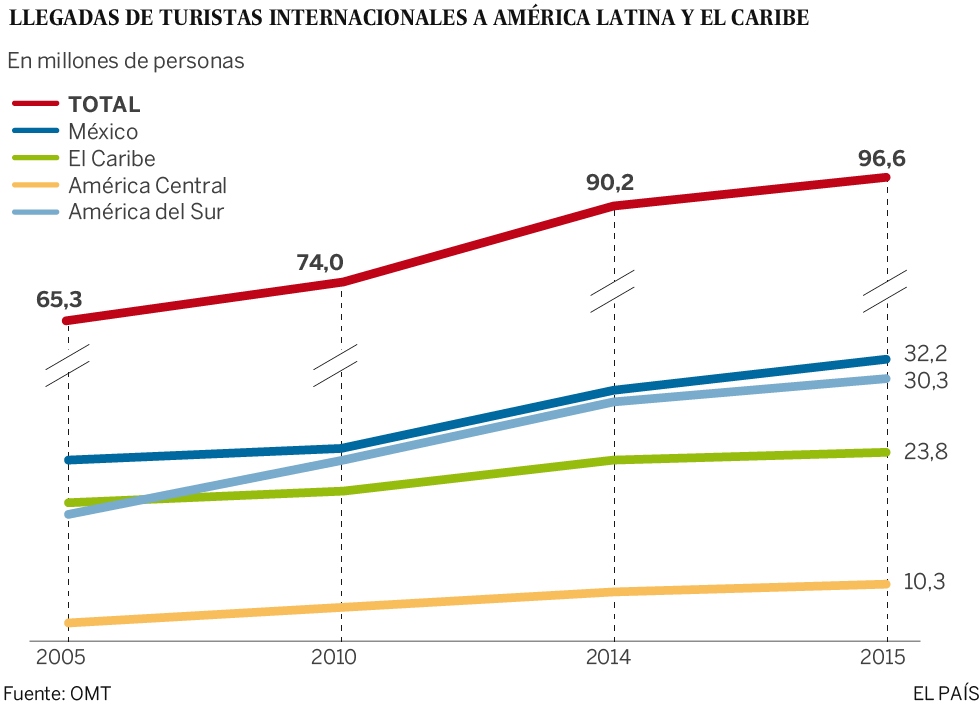

In [276]:
Image('turismo_america_sur.png',width=500)

According to the graph in recent years the trend in the number of tourists visiting South America is increasing, and that is why you have to present additional information that may interest you when visiting a city.

### ***Interested in the project.***





One of those interested would be travel agencies, as they could recommend to tourists cities in South America that are similar to what they are looking for at a lower price.
The tourists themselves, since they could build an application with the Foursquare data, and make comparisons of cities, for example, according to restaurants, hotels, museums, etc.

# **Data**

---





*   Foursquare

> It offers the Database of places, you can access accurate and updated data of the places of community origin. The large selection of rich location data and unlocks the potential to improve your application or website with the ability to describe locations, analyze trends and improve the user experience. With the API offered by Foursquare we will obtain the data of restaurants, squares, museums, etc., of the cities that we are interested in analyzing.




*   GeoData

> It is a web page (https://www.geodatos.net/poblacion), where it shows for each country the ten most populated cities, as well as longitude and latitude, for example, for Peru, my country.





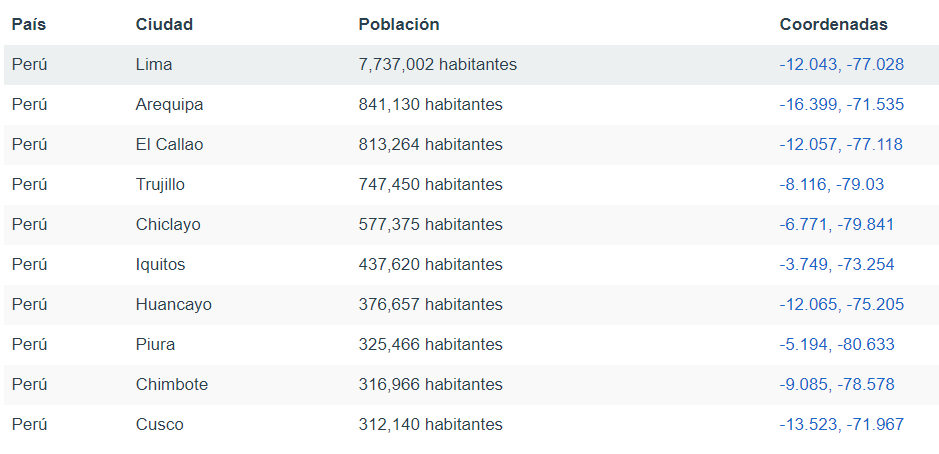

In [278]:
Image('muestra_geodata_peru.png',width=600)

To solve the problem, we are only interested in the countries of South America:
* Peru
* Colombia
* Ecuador
* Argentina
* Chile
* Uruguay
* Paraguay
* Brazil
* Bolivia
 Venezuela

# **Methodology:**

---



* Web scraping:
> Web scraping is a technique used through software programs to extract information from websites. Usually, these programs simulate the navigation of a human on the World Wide Web either by using the HTTP protocol manually, or by embedding a browser in an application. This technique will be used on the website https://www.geodatos.net/poblacion, in which the aforementioned data will be obtained.

In [0]:
## Web scraping

pais=list()
ciudad=list()
poblacion=list()
coordenadas=list()

paises_sud=['peru','venezuela','colombia','ecuador','brasil','paraguay','uruguay','chile','argentina','bolivia']

for pa in paises_sud:

  for i in np.arange(1,11):

    url='https://www.geodatos.net/poblacion/'+pa
    page=requests.get(url).text
    soup=BeautifulSoup(page,'html.parser')
    pais.append(soup.find_all('tr')[i].find_all('td')[0].text)
    ciudad.append(soup.find_all('tr')[i].find_all('td')[1].text)
    poblacion.append(soup.find_all('tr')[i].find_all('td')[2].text)
    coordenadas.append(soup.find_all('tr')[i].find_all('td')[3].text)


In [285]:
# data geodata
data_sud=pd.DataFrame(columns=['pais','ciudad','poblacion','coordenadas'])
data_sud['pais']=pais
data_sud['ciudad']=ciudad
data_sud['poblacion']=poblacion
data_sud['coordenadas']=coordenadas
data_sud.head()

,pais,ciudad,poblacion,coordenadas
0,Perú,Lima,"7,737,002 habitantes","-12.043, -77.028"
1,Perú,Arequipa,"841,130 habitantes","-16.399, -71.535"
2,Perú,El Callao,"813,264 habitantes","-12.057, -77.118"
3,Perú,Trujillo,"747,450 habitantes","-8.116, -79.03"
4,Perú,Chiclayo,"577,375 habitantes","-6.771, -79.841"


In [284]:
## data preprocesing

data_sud=pd.DataFrame(columns=['pais','ciudad','poblacion','coordenadas'])
data_sud['pais']=pais
data_sud['ciudad']=ciudad
data_sud['poblacion']=poblacion
data_sud['coordenadas']=coordenadas


data_sud['num_poblacion']=data_sud.poblacion.str.split(' ', expand=True)[0]
data_sud['num_poblacion']=data_sud.num_poblacion.str.replace(',','')
data_sud['num_poblacion']=data_sud.num_poblacion.astype('long')
data_sud['latitude']=data_sud.coordenadas.str.split(',',expand=True)[0]
data_sud['longitude']=data_sud.coordenadas.str.split(',',expand=True)[1]
data_sud['new_ciudad']=data_sud.ciudad.str.replace(' ','_')
data_sud.latitude=data_sud.latitude.astype('float')
data_sud.longitude=data_sud.longitude.astype('float')
data_sud=data_sud[['pais','ciudad','num_poblacion','latitude','longitude']].copy()
data_sud.head()


,pais,ciudad,num_poblacion,latitude,longitude
0,Perú,Lima,7737002,-12.043,-77.028
1,Perú,Arequipa,841130,-16.399,-71.535
2,Perú,El Callao,813264,-12.057,-77.118
3,Perú,Trujillo,747450,-8.116,-79.030
4,Perú,Chiclayo,577375,-6.771,-79.841




*  K-means 
> K-means is an unsupervised classification (clustering) algorithm that groups objects into k groups based on their characteristics. Clustering is done by minimizing the sum of distances between each object and the centroid of its group or cluster. The quadratic distance is usually used.


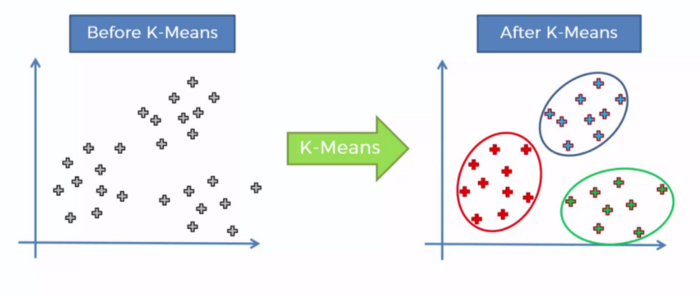

In [287]:
Image('Kmeans.png',width=500)


> The cluster number can be determined by inertia.


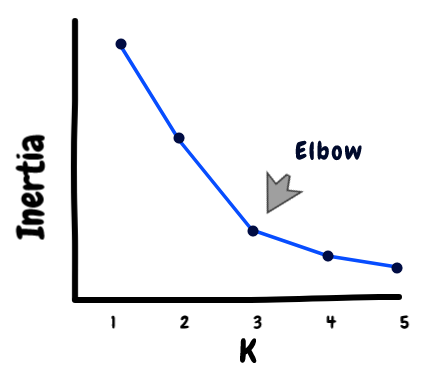

In [290]:
Image('inertia.png',width=300)

# **Exploratory analysis**

---



In the following graph you can show all the cities to be purchased, to determine which cities are similar to each other.

In [0]:
address = 'america del sur'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

for lat, lon, Ciudad in zip(data_sud['latitude'], data_sud['longitude'], data_sud['Ciudad']):
    folium.CircleMarker(
        [lat, lon],
        radius=3).add_to(map_clusters)
map_clusters

The geograpical coordinate of Manhattan are -21.0002179, -61.0006565.


In addition, the following image shows the number of populations for each city, in which it is appreciated that countries such as Peru, the most populated cities are concentrated in the northern part, on the contrary, in Brazil the most populated cities are dispersed.

In [220]:
from folium.plugins import HeatMap

address = 'america del sur'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

m = folium.Map(location=[latitude, longitude], zoom_start=4)


data=data_sud[['latitude','longitude','num_poblacion']].values.tolist()
HeatMap(data,radius = 9).add_to(m)
m

The geograpical coordinate of Manhattan are -21.0002179, -61.0006565.


In [118]:
data_sud.sort_values(by='num_poblacion', ascending=False)

,pais,ciudad,poblacion,coordenadas,num_poblacion,latitude,longitude,new_ciudad
80,Argentina,Buenos Aires,"13,076,300 habitantes","-34.613, -58.377",13076300,-34.613,-58.377,Buenos_Aires
40,Brasil,São Paulo,"10,021,295 habitantes","-23.548, -46.636",10021295,-23.548,-46.636,São_Paulo
0,Perú,Lima,"7,737,002 habitantes","-12.043, -77.028",7737002,-12.043,-77.028,Lima
20,Colombia,Bogotá,"7,674,366 habitantes","4.61, -74.082",7674366,4.61,-74.082,Bogotá
41,Brasil,Río de Janeiro,"6,023,699 habitantes","-22.906, -43.182",6023699,-22.906,-43.182,Río_de_Janeiro
...,...,...,...,...,...,...,...,...
65,Uruguay,Maldonado,"55,478 habitantes","-34.9, -54.95",55478,-34.9,-54.95,Maldonado
66,Uruguay,Tacuarembó,"51,854 habitantes","-31.717, -55.981",51854,-31.717,-55.981,Tacuarembó
67,Uruguay,Melo,"51,023 habitantes","-32.37, -54.167",51023,-32.37,-54.167,Melo
68,Uruguay,Mercedes,"42,359 habitantes","-33.252, -58.03",42359,-33.252,-58.03,Mercedes


Extracting data with API Foursquare

In [0]:
CLIENT_ID = '3B15LWZNHHQ0D2UFQ3VOLV5FTKOIULMUTXHEIE3WQNJGQIME' # your Foursquare ID
CLIENT_SECRET = 'NBDANS0F4530VAASAPG1IPNSELEXXXKYTVZC200QP43FAKYX' # your Foursquare Secret
VERSION = '20180604'

In [0]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=2500
    LIMIT=200
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [225]:
df_sud_venues = getNearbyVenues(names=data_sud['ciudad'],
                                   latitudes=data_sud['latitude'],
                                   longitudes=data_sud['longitude']
                                  )

Lima
Arequipa
El Callao
Trujillo
Chiclayo
Iquitos
Huancayo
Piura
Chimbote
Cusco
Caracas
Maracaibo
Maracay
Valencia
Barquisimeto
Ciudad Guayana
Barcelona
Maturín
Puerto de La Cruz
Petare
Bogotá
Cali
Medellín
Barranquilla
Cartagena de Indias
Cúcuta
Bucaramanga
Pereira
Santa Marta
Ibagué
Guayaquil
Quito
Cuenca
Santo Domingo de los Colorados
Machala
Manta
Portoviejo
Eloy Alfaro
Esmeraldas
Ambato
São Paulo
Río de Janeiro
Salvador
Fortaleza
Belo Horizonte
Brasilia
Curitiba
Manaos
Recife
Belém
Asunción
Ciudad del Este
San Lorenzo
Capiatá
Lambaré
Fernando de la Mora
Limpio
Nemby
Pedro Juan Caballero
Encarnación
Montevideo
Salto
Paysandú
Las Piedras
Rivera
Maldonado
Tacuarembó
Melo
Mercedes
Artigas
Santiago de Chile
Puente Alto
Antofagasta
Viña del Mar
Valparaíso
Talcahuano
San Bernardo
Temuco
Iquique
Concepción
Buenos Aires
Córdoba
Rosario
Ciudad de Mendoza
San Miguel de Tucumán
La Plata
Mar del Plata
Quilmes
Ciudad de Salta
Ciudad de Santa Fe
Santa Cruz de la Sierra
Cochabamba
La Paz
Sucre
Or

In [226]:
df_sud_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lima,-12.043,-77.028,Casa de la Literatura Peruana,-12.044254,-77.028628,Museum
1,Lima,-12.043,-77.028,Plaza Mayor de Lima,-12.045983,-77.030565,Plaza
2,Lima,-12.043,-77.028,Convento Santo Domingo,-12.044085,-77.031437,Monastery
3,Lima,-12.043,-77.028,Churros San Francisco,-12.045925,-77.028423,Bakery
4,Lima,-12.043,-77.028,Museo Catacumbas de San Francisco,-12.045422,-77.027637,Historic Site


In [227]:
df_sud_venues.shape

(6711, 7)

In [247]:
df_sud_venues['Venue Category'].value_counts().to_frame().head(10)

,Venue Category
Restaurant,329
Hotel,309
Pizza Place,257
Café,222
Ice Cream Shop,198
Plaza,189
Bar,186
Coffee Shop,178
Bakery,165
Burger Joint,133


Foursquare data, all the places such as restaurants, squares, etc., of all the cities obtained through the web scraping are obtained. The places that stand out are restaurants, hotels and places for public places.

In [228]:
# one hot encoding
sud_onehot = pd.get_dummies(df_sud_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sud_onehot['Neighborhood'] = df_sud_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sud_onehot.columns[-1]] + list(sud_onehot.columns[:-1])
sud_onehot = sud_onehot[fixed_columns]

sud_onehot.head()

,Zoo Exhibit,Acai House,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Baiano Restaurant,Bakery,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,...,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tour Provider,Toy / Game Store,Track,Track Stadium,Trail,Train,Train Station,Tram Station,Travel Lounge,Tunnel,University,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Warehouse Store,Water Park,Waterfront,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [229]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

sud_grouped = sud_onehot.groupby('Neighborhood').mean().reset_index()
sud_grouped

,Neighborhood,Zoo Exhibit,Acai House,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Baiano Restaurant,Bakery,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,...,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tour Provider,Toy / Game Store,Track,Track Stadium,Trail,Train,Train Station,Tram Station,Travel Lounge,Tunnel,University,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Warehouse Store,Water Park,Waterfront,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Ambato,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.000000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.062500,0.00,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.020833,0.00,0.00,0.00,...,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.020833,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.0,0.0,0.0
1,Antofagasta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.013158,0.00,0.013158,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.026316,0.00,0.0,0.013158,0.013158,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.000000,0.00,0.00,0.00,...,0.0,0.00,0.0,0.013158,0.0,0.0,0.00,0.013158,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.0,0.013158,0.0,0.0,0.0,0.0,0.013158,0.0,0.0,0.013158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,Arequipa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.000000,0.01,0.000000,0.00,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.010000,0.00,0.0,0.010000,0.020000,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.020000,0.00,0.00,0.00,...,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,Artigas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.000000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.000000,0.00,0.00,0.00,...,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,Asunción,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.000000,0.00,0.000000,0.00,0.0,0.0,0.03,0.0,0.0,0.0,0.0,0.010000,0.00,0.0,0.040000,0.070000,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.000000,0.00,0.00,0.00,...,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.020000,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.020000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Temuco,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.01,0.000000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.030000,0.00,0.0,0.010000,0.020000,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.000000,0.00,0.00,0.01,...,0.0,0.02,0.0,0.000000,0.0,0.0,0.00,0.010000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.01,0.000000,0.0,0.010000,0.0,0.0,0.0,0.0,0.010000,0.0,0.0,0.010000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
96,Trujillo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.010000,0.00,0.0,0.0,0.01,0.0,0.0,0.0,0.0

In [242]:
num_top_venues = 5

for hood in sud_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = sud_grouped[sud_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ambato----
                venue  freq
0  Mexican Restaurant  0.08
1               Hotel  0.08
2      Ice Cream Shop  0.06
3         Pizza Place  0.06
4                Park  0.06


----Antofagasta----
            venue  freq
0      Restaurant  0.09
1            Café  0.04
2     Snack Place  0.03
3       BBQ Joint  0.03
4  Ice Cream Shop  0.03


----Arequipa----
                 venue  freq
0                Hotel  0.14
1  Peruvian Restaurant  0.10
2   Seafood Restaurant  0.05
3           Restaurant  0.05
4       Sandwich Place  0.04


----Artigas----
                  venue  freq
0             Rest Area  0.12
1                 Plaza  0.12
2  Brazilian Restaurant  0.12
3           Pizza Place  0.12
4      Department Store  0.12


----Asunción----
                       venue  freq
0                        Bar  0.07
1                        Gym  0.05
2       Gym / Fitness Center  0.05
3  South American Restaurant  0.04
4         Chinese Restaurant  0.04


----Barcelona----
           

# **Results**

---



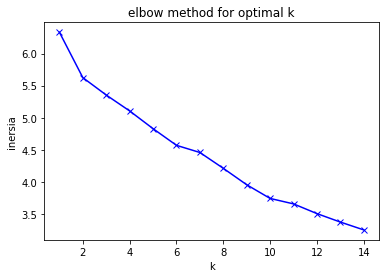

In [230]:
# cluster number 

sud_grouped_clustering = sud_grouped.drop('Neighborhood', 1)

inersia = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=0,n_init=10, max_iter=90000)
    model = k_means.fit(sud_grouped_clustering)
    inersia.append(k_means.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('inersia')
plt.title('elbow method for optimal k')
plt.show()

In [248]:
# set number of clusters
kclusters = 6

sud_grouped_clustering = sud_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0,n_init=10, max_iter=90000).fit(sud_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 4, 0, 0, 4, 4, 4, 4, 4, 4], dtype=int32)

In [249]:
kmeans.labels_

array([0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0,
       0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0, 4,
       4, 4, 3, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 0, 1, 3, 4, 4, 5, 0, 4,
       4, 4, 0, 0, 0, 4, 0, 2, 4, 4, 4, 0, 4, 4, 3, 0, 4, 4, 4, 4, 4, 0,
       4, 0, 0, 4, 3, 4, 0, 4, 4, 4, 4, 4], dtype=int32)

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [251]:
indicators = ['st', 'nd', 'rd']
num_top_venues = 5
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sud_grouped['Neighborhood']

for ind in np.arange(sud_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sud_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Ambato,Hotel,Mexican Restaurant,Pizza Place,Ice Cream Shop,BBQ Joint
1,Antofagasta,Restaurant,Café,Gastropub,Bistro,Sporting Goods Shop
2,Arequipa,Hotel,Peruvian Restaurant,Seafood Restaurant,Restaurant,Sandwich Place
3,Artigas,Department Store,Pizza Place,Brazilian Restaurant,Hotel,Rest Area
4,Asunción,Bar,Gym / Fitness Center,Gym,Bakery,Ice Cream Shop


In [0]:
data_sud.rename(columns={'ciudad':'Neighborhood'},inplace=True)

In [253]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sud_merged = data_sud

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
sud_merged = sud_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

sud_merged.head()

,pais,Neighborhood,poblacion,coordenadas,num_poblacion,latitude,longitude,new_ciudad,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Perú,Lima,"7,737,002 habitantes","-12.043, -77.028",7737002,-12.043,-77.028,Lima,4,Chinese Restaurant,Plaza,Restaurant,Sandwich Place,Peruvian Restaurant
1,Perú,Arequipa,"841,130 habitantes","-16.399, -71.535",841130,-16.399,-71.535,Arequipa,0,Hotel,Peruvian Restaurant,Seafood Restaurant,Restaurant,Sandwich Place
2,Perú,El Callao,"813,264 habitantes","-12.057, -77.118",813264,-12.057,-77.118,El_Callao,4,Seafood Restaurant,Coffee Shop,Chinese Restaurant,Restaurant,Fried Chicken Joint
3,Perú,Trujillo,"747,450 habitantes","-8.116, -79.03",747450,-8.116,-79.030,Trujillo,4,BBQ Joint,Ice Cream Shop,Pizza Place,Restaurant,Peruvian Restaurant
4,Perú,Chiclayo,"577,375 habitantes","-6.771, -79.841",577375,-6.771,-79.841,Chiclayo,4,Restaurant,Hotel,Coffee Shop,Chinese Restaurant,Peruvian Restaurant


In [0]:
sud_merged=sud_merged.loc[~(sud_merged['Cluster Labels'].isna())]

In [261]:
kclusters=6

address = 'america del sur'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=3.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow= ['#FFFF00','#0000FF','#008000','#FF0000','#8A2BE2','#FFA500']#FF0000

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sud_merged['latitude'], sud_merged['longitude'], sud_merged['Neighborhood'], sud_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[int(cluster)-3],
        fill=True,
        fill_color=rainbow[int(cluster)-3],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

The geograpical coordinate of Manhattan are -21.0002179, -61.0006565.


The following groupings were obtained for the most important cities in South America, where it is observed that cities with the characteristics of cluster 4 occur in all the countries of the continent. It is emphasized that the two atypical cities are located in Bolivia, this means that tourists looking for new things could be recommended Bolivia, and another of the atypical cities is located in Uruguay.

In [263]:
sud_merged['Cluster Labels'].value_counts().to_frame()

,Cluster Labels
4,69
0,24
3,4
5,1
2,1
1,1


# **Discussions and recommendations**

* You could reduce the amount of cluster and see the results, since we obtained 
three cities in a single group. It would also be grouped by oreo algorithm such as DBscan, Hierarchical Cluster.

* You could also compare these cities with the rest of the world and observe similarities between different continents, since the differences in cultures are well marked.

* According to the results it is recommended, for example to tourists, to visit Bolivia since they have cities with different characteristics. For tourists who are already accustomed to certain places and do not want to change, Brazil, Chile or Colombia are recommended.
It is recommended to generate an application that can compare cities and obtain those that are similar by grouping Kmeans cluster and Foursquare data.
conclusion

# **Conclusion**

In conclusion there are two well-defined groups, and the rest would indicate cities that are interesting to analyze.
Generating this type of alternatives in greater detail would be interesting for tourists who do not know anything about South America.